# Goal: Create a model that can classify cat and dog images

In [2]:
import tensorflow as tf

In [8]:
# Preprocessing --- Goal is to make your data compatible for CNN !!!
# Tensorflow offers direct classes to achieve the same

# Image Generators
# rescale= 1.0 / 255.  ensures my intensities of each pixel will be in the range of 0 - 255 (Image Normalization)

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(  rescale= 1.0 / 255. ,
                                                                    rotation_range=30,
                                                                    zoom_range=0.2,
                                                                    horizontal_flip=True, 
                                                                    fill_mode='nearest' )
test_generator = tf.keras.preprocessing.image.ImageDataGenerator( rescale= 1.0 / 255. )

In [20]:
#Image Gen for Cat
imageGen = train_generator.flow_from_directory("catDataset/",
                         batch_size=1,
                         save_to_dir="outputCatDog/cat/", #Ensure the directory exists else prog will throw error
                         save_prefix="cat-",
                         save_format="jpg")
counter = 0
for generatedImage in imageGen:
    
    counter += 1 
    
    if counter == 250:
        break

Found 17 images belonging to 2 classes.


In [24]:
#Image Gen for dog
imageGen = train_generator.flow_from_directory("dogDataset/",
                         batch_size=1,
                         save_to_dir="outputCatDog/dog/", #Ensure the directory exists else prog will throw error
                         save_prefix="dog-",
                         save_format="jpg")
counter = 0
for generatedImage in imageGen:
    
    counter += 1 
    
    if counter == 250:
        break

Found 17 images belonging to 2 classes.


In [3]:
# Pass the images through generator to generate compatible inputs
train_generator1 = tf.keras.preprocessing.image.ImageDataGenerator(  rescale= 1.0 / 255.
                                                                  )
test_generator1 = tf.keras.preprocessing.image.ImageDataGenerator( rescale= 1.0 / 255. )

trainImageData = train_generator1.flow_from_directory('cats_and_dogs/train' ,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(64,64)) 


testImageData = train_generator1.flow_from_directory('cats_and_dogs/validation' ,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(64,64)) 

Found 2502 images belonging to 3 classes.
Found 1000 images belonging to 2 classes.


In [26]:
#Architect our CNN
trainImageData.image_shape

(64, 64, 3)

In [27]:
model = tf.keras.models.Sequential()
#Conv2D(noFeatureMaps , kernelShape, input_shape, activation)


#Step1: Create First Convolutional Layer
#Convolve Layer
model.add(tf.keras.layers.Conv2D(32 , (3,3) , input_shape = (64, 64, 3) , activation = 'relu' , padding='same'))
#Pooling Layer
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2) ))
#model.add(tf.keras.layers.AveragePooling2D(pool_size = (2,2) ))

#Step2: Create Second Convolutional Layer
#Convolve Layer
model.add(tf.keras.layers.Conv2D(16 , (3,3) , activation = 'relu' , padding='same'))
#Pooling Layer
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2) ))

#Step3: Flatten

model.add(tf.keras.layers.Flatten())

#Step4:

model.add(tf.keras.layers.Dense(units= 512 , activation = 'relu'))
model.add(tf.keras.layers.Dense(units= 256 , activation = 'relu'))

model.add(tf.keras.layers.Dense(units= 1 , activation = 'sigmoid'))


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               2097664   
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

In [29]:
#Compile
model.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=['accuracy']
             )

In [30]:
int(len(trainImageData.filenames) / trainImageData.batch_size)

125

In [31]:
#Fit

history = model.fit(trainImageData,
                   validation_data=testImageData,
                   epochs=50,
                   steps_per_epoch= int(len(trainImageData.filenames) / trainImageData.batch_size), #No of Images / batch size
                   validation_steps= int(len(testImageData.filenames) / testImageData.batch_size)
                   )

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 125 steps, validate for 50 steps
Epoch 1/50
125/125 [==============================] - 28s 223ms/step - loss: -11352584.1682 - accuracy: 0.5002 - val_loss: 91315709.2000 - val_accuracy: 0.5000
Epoch 2/50
125/125 [==============================] - 23s 187ms/step - loss: -2208105845.9252 - accuracy: 0.4978 - val_loss: 8159859425.2800 - val_accuracy: 0.5000
Epoch 3/50
125/125 [==============================] - 24s 190ms/step - loss: -37271500189.2609 - accuracy: 0.5006 - val_loss: 90599693189.1200 - val_accuracy: 0.5000
Epoch 4/50
125/125 [==============================] - 24s 191ms/step - loss: -238126686831.2588 - accuracy: 0.5002 - val_loss: 459773519462.4000 - val_accuracy: 0.5000
Epoch 5/50
125/125 [==============================] - 24s 189ms/step - loss: -915315611781.5826 - accuracy: 0.4998 - val_loss: 1522134417408.0000 - val_accuracy: 0.5000
Epoch 6/50
125/125 [==============================] - 24s 189ms/step - loss: -2605010545980.0059 - accuracy: 0.4994 - val_loss: 39

# Attempt 2 

In [ ]:
model = tf.keras.models.Sequential()
#Conv2D(noFeatureMaps , kernelShape, input_shape, activation)


#Step1: Create First Convolutional Layer
#Convolve Layer
model.add(tf.keras.layers.Conv2D(16 , (3,3) , input_shape = (64, 64, 3) , activation = 'relu' , padding='same'))
#Pooling Layer
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2) ))
#model.add(tf.keras.layers.AveragePooling2D(pool_size = (2,2) ))

#Step2: Create Second Convolutional Layer
#Convolve Layer
model.add(tf.keras.layers.Conv2D(16 , (3,3) , activation = 'relu' , padding='same'))
#Pooling Layer
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2) ))

#Step3: Flatten

model.add(tf.keras.layers.Flatten())

#Step4:

model.add(tf.keras.layers.Dense(units= 512 , activation = 'relu'))
model.add(tf.keras.layers.Dense(units= 256 , activation = 'relu'))

model.add(tf.keras.layers.Dense(units= 1 , activation = 'sigmoid'))

#Compile
model.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=['accuracy']
             )


history2 = model.fit(trainImageData,
                   validation_data=testImageData,
                   epochs=50,
                   steps_per_epoch= int(len(trainImageData.filenames) / trainImageData.batch_size), #No of Images / batch size
                   validation_steps= int(len(testImageData.filenames) / testImageData.batch_size)
                   )


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 125 steps, validate for 50 steps
Epoch 1/50
125/125 [==============================] - 24s 193ms/step - loss: -5711676.9332 - accuracy: 0.4966 - val_loss: 44259080.0400 - val_accuracy: 0.5000
Epoch 2/50
125/125 [==============================] - 24s 192ms/step - loss: -1001648784.8986 - accuracy: 0.5010 - val_loss: 3629669329.9200 - val_accuracy: 0.5000
Epoch 3/50
125/125 [==============================] - 23s 184ms/step - loss: -16390015536.6006 - accuracy: 0.5010 - val_loss: 39957151539.2000 - val_accuracy: 0.5000
Epoch 4/50
125/125 [==============================] - 24s 190ms/step - loss: -104469821730.6388 - accuracy: 0.5006 - val_loss: 202764119572.4800 - val_accuracy: 0.5000
Epoch 5/50
125/125 [==============================] - 24s 191ms/step - loss: -404338362053.3112 - accuracy: 0.5002 - val_loss: 674495630540.8000 - val_accuracy: 0.5000
Epoch 6/50
125/125 [==============================] - 24s 190ms/step - loss: -1149069443399.4641 - accuracy: 0.5006 - val_loss: 1750

# Attempt 3

In [19]:
model = tf.keras.models.Sequential()
#Conv2D(noFeatureMaps , kernelShape, input_shape, activation)


#Step1: Create First Convolutional Layer
#Convolve Layer
model.add(tf.keras.layers.Conv2D(16 , (3,3) , input_shape = (64, 64, 3) , activation = 'tanh' , padding='same'))
#Pooling Layer
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2) ))
#model.add(tf.keras.layers.AveragePooling2D(pool_size = (2,2) ))

#Step2: Create Second Convolutional Layer
#Convolve Layer
model.add(tf.keras.layers.Conv2D(16 , (3,3) , activation = 'tanh' , padding='same'))
#Pooling Layer
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2) ))

#Step3: Flatten

model.add(tf.keras.layers.Flatten())

#Step4:
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 512 , activation = 'relu'))
model.add(tf.keras.layers.Dense(units= 256 , activation = 'relu'))

model.add(tf.keras.layers.Dense(units= 1 , activation = 'sigmoid'))

#Compile
model.compile(optimizer=tf.keras.optimizers.Nadam(),
             loss="binary_crossentropy",
              metrics=['accuracy']
             )


history2 = model.fit(trainImageData,
                   validation_data=testImageData,
                   epochs=50,
                   steps_per_epoch= int(len(trainImageData.filenames) / trainImageData.batch_size), #No of Images / batch size
                   validation_steps= int(len(testImageData.filenames) / testImageData.batch_size)
                   )

Epoch 1/50
100/100 [==============================] - 4s 36ms/step - loss: 0.7040 - accuracy: 0.5765 - val_loss: 0.6757 - val_accuracy: 0.5980
Epoch 2/50
100/100 [==============================] - 3s 35ms/step - loss: 0.6535 - accuracy: 0.6190 - val_loss: 0.6244 - val_accuracy: 0.6560
Epoch 3/50
100/100 [==============================] - 3s 34ms/step - loss: 0.5616 - accuracy: 0.7000 - val_loss: 0.6273 - val_accuracy: 0.6730
Epoch 4/50
100/100 [==============================] - 3s 34ms/step - loss: 0.4736 - accuracy: 0.7775 - val_loss: 0.6762 - val_accuracy: 0.6580
Epoch 5/50
100/100 [==============================] - 3s 34ms/step - loss: 0.3667 - accuracy: 0.8300 - val_loss: 0.6500 - val_accuracy: 0.6970
Epoch 6/50
100/100 [==============================] - 3s 35ms/step - loss: 0.2548 - accuracy: 0.8945 - val_loss: 0.8056 - val_accuracy: 0.6470
Epoch 7/50
100/100 [==============================] - 3s 34ms/step - loss: 0.1850 - accuracy: 0.9340 - val_loss: 1.1080 - val_accuracy: 0.6110

KeyboardInterrupt: 

# Use the model to classify the image

In [20]:
model

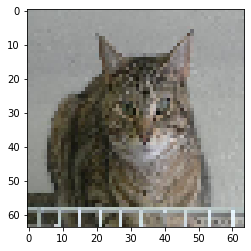

In [24]:
img = tf.keras.preprocessing.image.load_img('cats_and_dogs/train/cats/cat.103.jpg' , target_size=(64,64))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img)

In [26]:

imgArray = tf.keras.preprocessing.image.img_to_array(img)

imgArray.shape

(64, 64, 3)

In [27]:
import numpy as np
compatibleImgArray = np.expand_dims(imgArray, axis=0)

compatibleImgArray.shape

(1, 64, 64, 3)

In [28]:
model.predict_classes(compatibleImgArray)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0]])

In [30]:
trainImageData.class_indices

{'cats': 0, 'dogs': 1}

In [31]:
if model.predict_classes(compatibleImgArray) == 0:
    print("Its a Cat")
else:
    print("Its a Dog")

Its a Cat
